In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from itertools import *

import json
import os
import time
import sys
import xmltodict
from datetime import datetime


PATH = "/Users/alexandrarottenkolber/Documents/02_Hertie_School/Master thesis/Master_Thesis_Hertie/data_analysis/01_data/Plenarprotokolle/"

In [2]:
with open(PATH + 'processed/id2speech_concat_POSTag_inshape.txt', 'r') as infile:
    id2rede_12_19 = json.load(infile)
infile.close()

In [3]:
with open(PATH + 'processed/speech2KL_lda_model_concat_POSTag_self_tuned_all_without_very_short_speeches.txt', 'r') as infile:
    speech2KL = json.load(infile)
infile.close()

In [4]:
NamesAndSpeeches = pd.read_csv(PATH + "processed/NamesAndSpeeches_full.csv").drop(columns = ["Unnamed: 0"])

In [5]:
NamesAndSpeeches.head()

,speeches,politicianID,surname_lower_comb,forename_lower_comb,pageid,wikidataid,name
0,"[471526, 479132, 489844]",11000246.0,brandt,willy,1518001.0,Q2514,Willy Brandt
1,"[471554, 471574, 471612, 471651, 471680, 47168...",11002287.0,süssmuth,rita,4253.0,Q66286,Rita Süssmuth
2,"[471532, 471825, 471980, 472676, 473851, 47411...",11002354.0,ullmann,wolfgang,300219.0,Q895636,Wolfgang Ullmann
3,"[471527, 471596, 471692, 473651, 479473, 50886...",11000418.0,dregger,alfred,73446.0,Q65389,Alfred Dregger
4,"[471536, 471967, 472560, 473468, 473996, 47411...",11000891.0,heuer,uwe-jens,1097338.0,Q1594398,Uwe-Jens Heuer


In [6]:
len(NamesAndSpeeches)

2187

In [9]:
NamesAndSpeeches[NamesAndSpeeches["wikidataid"] == "Q27975838"]

,speeches,politicianID,surname_lower_comb,forename_lower_comb,pageid,wikidataid,name
2042,NaN,NaN,NaN,NaN,9716234.0,Q27975838,Alice Weidel


In [11]:
id2rede_12_19['471583']['electoralTerm']#.keys()

'12'

In [12]:
id2rede_12_19['471583'].keys()

dict_keys(['concatSpeech', 'name', 'date', 'data_ready', 'electoralTerm', 'firstName', 'lastName', 'politicianId', 'positionShort', 'positionLong', 'date_control', 'timestamp'])

In [13]:
speech2KL.keys()

dict_keys(['1', '3', '5', '7', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', '500', '1000'])

In [14]:
def string_to_list(string): 
    if string is np.nan: 
        res = np.nan
    elif type(string) == str: 
        res = string.replace("[", "").replace("]", "").split(", ")
        
    return res

In [15]:
NamesAndSpeeches["speeches"] = NamesAndSpeeches["speeches"].map(lambda x : string_to_list(x))

In [16]:
NamesAndSpeeches.head(3)

,speeches,politicianID,surname_lower_comb,forename_lower_comb,pageid,wikidataid,name
0,"[471526, 479132, 489844]",11000246.0,brandt,willy,1518001.0,Q2514,Willy Brandt
1,"[471554, 471574, 471612, 471651, 471680, 47168...",11002287.0,süssmuth,rita,4253.0,Q66286,Rita Süssmuth
2,"[471532, 471825, 471980, 472676, 473851, 47411...",11002354.0,ullmann,wolfgang,300219.0,Q895636,Wolfgang Ullmann


In [17]:
NamesAndSpeeches_per_WP = pd.DataFrame()

In [18]:
speech_ids = []
WPs = []
date_stamp = []

for key in id2rede_12_19.keys(): 
    speech_ids.append(key)
    WPs.append(id2rede_12_19[key]["electoralTerm"])
    date_stamp.append(id2rede_12_19[key]["date"])

In [19]:
len(speech_ids), len(WPs), len(date_stamp) #(121038, 121038)

(121038, 121038, 121038)

In [20]:
speeches_and_WPs = pd.DataFrame(list(zip(speech_ids, WPs, date_stamp)), columns =['speeches', "WPs", "date"])

In [21]:
speeches_and_WPs

,speeches,WPs,date
0,471526,12,1990-12-20
1,471554,12,1990-12-20
2,471532,12,1990-12-20
3,471527,12,1990-12-20
4,471536,12,1990-12-20
...,...,...,...
121033,1066565,19,2021-09-06
121034,1066537,19,2021-09-06
121035,1066541,19,2021-09-06
121036,1066520,19,2021-09-06


In [22]:
#id2rede_12_19["1066606"]

In [23]:
for speech in NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == "Q2514"][0]: 
    print(speech)

471526
479132
489844


In [24]:
NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == "Q2514"]

0    [471526, 479132, 489844]
Name: speeches, dtype: object

In [25]:
NamesAndSpeeches["wikidataid"][1]

'Q66286'

In [26]:
NamesAndSpeeches.columns

Index(['speeches', 'politicianID', 'surname_lower_comb', 'forename_lower_comb',
       'pageid', 'wikidataid', 'name'],
      dtype='object')

In [27]:
#NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == ID]#[0]

In [28]:
list(NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == "Q20645389"])[0] is np.nan

True

In [29]:
speech2wikidataid = {}

for ID in list(NamesAndSpeeches["wikidataid"]): 
    
    if list(NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == ID])[0] is np.nan: 
        pass
    else:
        for speech in list(NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == ID])[0]: 
            speech2wikidataid[speech] = ID

In [30]:
len(speech2wikidataid) #116643

116643

In [31]:
def apply_dic_mapping(item): 
    if item in speech2wikidataid.keys(): 
        res = speech2wikidataid[item]
        
    else: 
        res = np.nan
        
    return res

In [32]:
speeches_and_WPs["wikidataid"] = speeches_and_WPs["speeches"].map(lambda x : apply_dic_mapping(x))

In [33]:
speeches_and_WPs[speeches_and_WPs["wikidataid"].isna() == True]

,speeches,WPs,date,wikidataid
20,471571,12,1991-01-14,NaN
21,471573,12,1991-01-14,NaN
31,471603,12,1991-01-17,NaN
32,471609,12,1991-01-17,NaN
71,471862,12,1991-01-31,NaN
...,...,...,...,...
121001,1066462,19,2021-08-24,NaN
121003,1066517,19,2021-09-06,NaN
121006,1066538,19,2021-09-06,NaN
121036,1066520,19,2021-09-06,NaN


In [34]:
with open(PATH + 'processed/speech2KL_WP19.txt', 'r') as infile: 
    speech2KL_WP19 = json.load(infile)
infile.close()

In [35]:
speeches_and_WPs[speeches_and_WPs["speeches"] == '1066506']

,speeches,WPs,date,wikidataid
121008,1066506,19,2021-09-06,Q99450


In [36]:
list(speeches_and_WPs["speeches"])[-30]

'1066506'

In [37]:
speech2KL_WP19["10"]['1066506']

{'novelty': 2.213904107861204,
 'transience': 1.8539109033568522,
 'resonance': 0.3599932045043517}

In [38]:
novelty = []
transience = []
resonance = []
window = 25

no_value = []

ls_speeches = list(speeches_and_WPs["speeches"])

for i in range(len(ls_speeches)): 
    #if speech in speech2KL_WP19[str(window)].keys():
    #    if "novelty" in speech2KL_WP19[str(window)][speech].keys():
    #        novelty.append(speech2KL_WP19[str(window)][speech]["novelty"])
    #    else:
    #        novelty.append(np.nan)
    #        
    #    if "transience" in speech2KL_WP19[str(window)][speech].keys():
    #        transience.append(speech2KL_WP19[str(window)][speech]["transience"])
    #    else: 
    #        transience.append(np.nan)    
    #        
    #    if "resonance" in speech2KL_WP19[str(window)][speech].keys():
    #        resonance.append(speech2KL_WP19[str(window)][speech]["resonance"])
    #    else: 
    #        resonance.append(np.nan) 
    
    if ls_speeches[i] in speech2KL[str(window)].keys():
        if "novelty" in speech2KL[str(window)][ls_speeches[i]].keys():
            novelty.append(speech2KL[str(window)][ls_speeches[i]]["novelty"])
        else: 
            print(i)
            novelty.append(np.nan)
                
        if "transience" in speech2KL[str(window)][ls_speeches[i]].keys():
            transience.append(speech2KL[str(window)][ls_speeches[i]]["transience"])
        else: 
            transience.append(np.nan)    
            
        if "resonance" in speech2KL[str(window)][ls_speeches[i]].keys():
            resonance.append(speech2KL[str(window)][ls_speeches[i]]["resonance"])
        else: 
            resonance.append(np.nan)  
            
    else: 
        no_value.append(i)
        novelty.append(np.nan)
        transience.append(np.nan)
        resonance.append(np.nan)

In [39]:
len(transience), len(no_value) #(121038, 2984)

(121038, 2984)

In [40]:
len(speeches_and_WPs)

121038

In [41]:
speeches_and_WPs["novelty"] = pd.Series(novelty)
speeches_and_WPs["transience"] = pd.Series(transience)
speeches_and_WPs["resonance"] = pd.Series(resonance)

In [42]:
speeches_and_WPs #121038 rows × 7 columns

,speeches,WPs,date,wikidataid,novelty,transience,resonance
0,471526,12,1990-12-20,Q2514,2.549234,2.488905,0.060329
1,471554,12,1990-12-20,Q66286,2.592673,2.386411,0.206261
2,471532,12,1990-12-20,Q895636,3.153690,3.067440,0.086250
3,471527,12,1990-12-20,Q65389,NaN,NaN,NaN
4,471536,12,1990-12-20,Q1594398,3.193564,2.898972,0.294592
...,...,...,...,...,...,...,...
121033,1066565,19,2021-09-06,Q40998965,NaN,NaN,NaN
121034,1066537,19,2021-09-06,Q18169686,NaN,NaN,NaN
121035,1066541,19,2021-09-06,Q15606894,NaN,NaN,NaN
121036,1066520,19,2021-09-06,NaN,NaN,NaN,NaN


In [43]:
speeches_and_WPs.head(5)

,speeches,WPs,date,wikidataid,novelty,transience,resonance
0,471526,12,1990-12-20,Q2514,2.549234,2.488905,0.060329
1,471554,12,1990-12-20,Q66286,2.592673,2.386411,0.206261
2,471532,12,1990-12-20,Q895636,3.153690,3.067440,0.086250
3,471527,12,1990-12-20,Q65389,NaN,NaN,NaN
4,471536,12,1990-12-20,Q1594398,3.193564,2.898972,0.294592


In [44]:
NamesAndSpeeches.columns

Index(['speeches', 'politicianID', 'surname_lower_comb', 'forename_lower_comb',
       'pageid', 'wikidataid', 'name'],
      dtype='object')

In [45]:
NamesWPSpeeches = pd.merge(speeches_and_WPs, NamesAndSpeeches[['politicianID', 'surname_lower_comb', 'forename_lower_comb',
       'pageid', 'wikidataid', 'name']], how = "left", left_on=["wikidataid"], right_on=["wikidataid"])

In [46]:
NamesWPSpeeches = NamesWPSpeeches.rename(columns = {"speeches" : "speech"})

In [47]:
NamesWPSpeeches.head(5)

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name
0,471526,12,1990-12-20,Q2514,2.549234,2.488905,0.060329,11000246.0,brandt,willy,1518001.0,Willy Brandt
1,471554,12,1990-12-20,Q66286,2.592673,2.386411,0.206261,11002287.0,süssmuth,rita,4253.0,Rita Süssmuth
2,471532,12,1990-12-20,Q895636,3.153690,3.067440,0.086250,11002354.0,ullmann,wolfgang,300219.0,Wolfgang Ullmann
3,471527,12,1990-12-20,Q65389,NaN,NaN,NaN,11000418.0,dregger,alfred,73446.0,Alfred Dregger
4,471536,12,1990-12-20,Q1594398,3.193564,2.898972,0.294592,11000891.0,heuer,uwe-jens,1097338.0,Uwe-Jens Heuer


In [48]:
NamesWPSpeeches["year"] = NamesWPSpeeches["date"].map(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
NamesWPSpeeches["month"] = NamesWPSpeeches["date"].map(lambda x: datetime.strptime(x, '%Y-%m-%d').month)

In [49]:
NamesWPSpeeches.head(5)

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name,year,month
0,471526,12,1990-12-20,Q2514,2.549234,2.488905,0.060329,11000246.0,brandt,willy,1518001.0,Willy Brandt,1990,12
1,471554,12,1990-12-20,Q66286,2.592673,2.386411,0.206261,11002287.0,süssmuth,rita,4253.0,Rita Süssmuth,1990,12
2,471532,12,1990-12-20,Q895636,3.153690,3.067440,0.086250,11002354.0,ullmann,wolfgang,300219.0,Wolfgang Ullmann,1990,12
3,471527,12,1990-12-20,Q65389,NaN,NaN,NaN,11000418.0,dregger,alfred,73446.0,Alfred Dregger,1990,12
4,471536,12,1990-12-20,Q1594398,3.193564,2.898972,0.294592,11000891.0,heuer,uwe-jens,1097338.0,Uwe-Jens Heuer,1990,12


In [50]:
#NamesWPSpeeches.to_csv(PATH + "./processed/NamesWPSpeeches.csv")

In [51]:
id2rede_12_19['471526'].keys() #dict_keys(['concatSpeech', 'name', 'date', 'data_ready', 'electoralTerm', 'firstName', 'lastName', 'politicianId', 'positionShort', 'positionLong', 'date_control', 'timestamp'])

dict_keys(['concatSpeech', 'name', 'date', 'data_ready', 'electoralTerm', 'firstName', 'lastName', 'politicianId', 'positionShort', 'positionLong', 'date_control', 'timestamp'])

In [52]:
NamesWPSpeeches["date"][10]

'1990-12-20'

In [53]:
speeches_and_WPs[speeches_and_WPs["WPs"] == "19"].tail(5)#(30) 

,speeches,WPs,date,wikidataid,novelty,transience,resonance
121033,1066565,19,2021-09-06,Q40998965,NaN,NaN,NaN
121034,1066537,19,2021-09-06,Q18169686,NaN,NaN,NaN
121035,1066541,19,2021-09-06,Q15606894,NaN,NaN,NaN
121036,1066520,19,2021-09-06,NaN,NaN,NaN,NaN
121037,1066606,19,2021-09-06,NaN,NaN,NaN,NaN


In [54]:
NamesWPSpeeches[NamesWPSpeeches["speech"] == '1066516']

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name,year,month
121024,1066516,19,2021-09-06,Q564328,1.908871,2.024505,-0.115634,11004245.0,baerbock,annalena,4967001.0,Annalena Baerbock,2021,9


In [55]:
#speech2KL["500"]

In [56]:
[list(speech2KL_WP19["100"].keys())[-1]]

['1066253']

In [57]:
list(speech2KL_WP19["25"].keys())[-1]

'1066516'

In [58]:
speech2KL_WP19["25"]['1066516']

{'novelty': 1.9094954024053783,
 'transience': 2.0175418083979877,
 'resonance': -0.1080464059926094}

In [59]:
speech2KL["25"]['1066516']

{'novelty': 1.9088706536543258,
 'transience': 2.024504943478037,
 'resonance': -0.11563428982371105}

In [60]:
speeches_and_WPs.columns # DATE IS MISSING!!!!!!!

Index(['speeches', 'WPs', 'date', 'wikidataid', 'novelty', 'transience',
       'resonance'],
      dtype='object')

In [61]:
speeches_and_WPs[speeches_and_WPs["date"] == '2021-05-06']

,speeches,WPs,date,wikidataid,novelty,transience,resonance
119938,1063050,19,2021-05-06,NaN,2.418201,2.461538,-0.043336
119939,1063136,19,2021-05-06,Q2590313,2.834857,2.831130,0.003727
119940,1063071,19,2021-05-06,Q97332,2.509440,2.796606,-0.287166
119941,1063270,19,2021-05-06,Q77195,2.157983,2.443720,-0.285737
119942,1063170,19,2021-05-06,Q11762,2.933550,2.729172,0.204379
...,...,...,...,...,...,...,...
120013,1063059,19,2021-05-06,Q18202322,2.979127,3.012757,-0.033630
120014,1063063,19,2021-05-06,NaN,2.988408,3.107007,-0.118599
120015,1063135,19,2021-05-06,NaN,2.880750,3.263802,-0.383052
120016,1063104,19,2021-05-06,NaN,3.158512,3.408175,-0.249663


In [62]:
id2rede

'/Users/alexandrarottenkolber/Documents/02_Hertie_School/Master thesis/Master_Thesis_Hertie/data_analysis/01_data/Plenarprotokolle/'

In [112]:
speeches_and_KL_19 = pd.read_csv(PATH + "./processed/speeches_and_KL_19.csv").rename(columns = {"Unnamed: 0": "speeches"})

In [113]:
speeches_and_KL_19.tail()

,speeches,novelty,transience,resonance
19136,1066543,2.627851,2.967004,-0.339153
19137,1066550,2.267331,2.578270,-0.310940
19138,1066552,2.445844,2.681773,-0.235928
19139,1066554,2.325480,2.468612,-0.143131
19140,1066556,2.638225,3.201299,-0.563074


In [114]:
with open(PATH + 'processed/speech2KL_WP19.txt', 'r') as infile: 
    speech2KL_WP19 = json.load(infile)
infile.close()

In [126]:
speech2KL_WP19.keys()

dict_keys(['5', '7', '10', '25', '100'])

In [115]:
NamesWPSpeeches.columns

Index(['speech', 'WPs', 'date', 'wikidataid', 'novelty', 'transience',
       'resonance', 'politicianID', 'surname_lower_comb',
       'forename_lower_comb', 'pageid', 'name'],
      dtype='object')

# add Party

In [211]:
party_dic = {'BÜNDNIS 90/DIE GRÜNEN': 'BÜNDNIS 90/DIE GRÜNEN', 
             'PDS': 'PDS', 
             'CDU': "CDU/CSU", 
             'SPD': 'SPD', 
             'FDP': 'FDP', 
             'CSU': "CDU/CSU",
             'DIE LINKE.': 'DIE LINKE.', 
             'Die Linke.': 'DIE LINKE.',
             'PDS/LL': 'PDS', 
             'Plos': 'Parteilos', 
             'AfD': 'AfD', 
            "CDU/CSU" : "CDU/CSU", 
            'Parteilos': 'Parteilos'}

In [212]:
MissingName2Party = {'Otto Graf Lambsdorff': "FDP", 
                     'Jörg Wolfgang Ganschow': "FDP", 
                     'Jürgen Möllemann': "FDP", 
                     'Rainer Ortleb': "FDP", 
                     'Harald B. Schäfer': "SPD", 
                     'Joachim Graf von Schönburg-Glauchau': "CDU", 
                     'Peter Reuschenbach': "SPD", 
                     'Uwe Lühr': "FDP", 
                     'Cornelia von Teichman und Logischen': "FDP", 
                     'Heinrich Leonhard Kolb': "FDP", 
                     'Verena Wohlleben': "SPD", 
                     'Lieselott Blunck': "SPD", 
                     'Kurt Rossmanith': "CSU", 
                     'Hans H. Gattermann': "FDP", 
                     'Karsten Voigt': "SPD", 
                     'Gerhard O. Pfeffermann': "CDU",  
                     'Ina Albowitz': "FDP", 
                     'Petra Bläss': "PDS", 
                     'Lutz Stavenhagen': "CDU", 
                     'Ferdinand Tillmann': "CDU", 
                     'Claudia Nolte': "CDU", 
                     'Gunter Weißgerber': "SPD", 
                     'Peter Paterna': "SPD", 
                     'Ursula Lehr': "CDU", 
                     'Klaus Lippold': "CDU", 
                     'Hans-Werner Müller': "CDU", 
                     'Roswitha Verhülsdonk': "CDU", 
                     'Ursula Seiler-Albring': "FDP", 
                     'Karl-Heinz Schröter': "SPD", 
                     'Herbert Meißner': "SPD", 
                     'Hedda Meseke': "CDU", 
                     'Erich G. Fritz': "CDU", 
                     'Heinz-Dieter Hackel': "FDP", 
                     'Jochen Welt': "SPD", 
                     'Paul Friedhoff': "FDP", 
                     'Hans Georg Wagner': "SPD", 
                     'Peter Harry Carstensen': "CDU", 
                     'Werner Skowron': "CDU", 
                     'Walter Franz Altherr': "CDU", 
                     'Karl Hermann Haack': "SPD", 
                     'Claire Marienfeld': "CDU", 
                     'Werner Schuster': "SPD", 
                     'Klaus-Dieter Uelhoff': "CDU", 
                     'Karl H. Fell': "CDU", 
                     'Erich Maaß': "CDU", 
                     'Hans P. H. Schuster': "FDP", 
                     'Reinhard Meyer zu Bentrup': "CDU", 
                     'Hans A. Engelhard': "FDP", 
                     'Heinrich Graf von Einsiedel': "SPD", 
                     'Gila Altmann': "Bündnis 90/Die Grünen", 
                     'Halo Saibold': "Bündnis 90/Die Grünen", 
                     'Wolfgang Ilte': "SPD", 
                     'Dagmar Wöhrl': "CSU", 
                     'Franz Peter Basten': "CDU", 
                     'Gottfried Tröger': "CDU", 
                     'Wilma Glücklich': "CDU", 
                     'Bernd Klaußner': "CDU", 
                     'Karl A. Lamers': "CDU",  
                     'Ulrike Merten': "SPD", 
                     'Sabine Jünger': "Die Linke.", 
                     'Axel Fischer': "CDU", 
                     'Sylvia Bonitz': "CDU",  
                     'Monika Balt': "PDS", 
                     'René Röspel': "SPD",  
                     'Gudrun Serowiecki': "FDP",  
                     'Melanie Oßwald': "CSU", 
                     'Elvira Drobinski-Weiß': "SPD",  
                     'Jutta Krüger-Jacob': "Bündnis 90/Die Grünen", 
                     'Ursula von der Leyen': "CDU", 
                     'Dorothée Menzner': "Die Linke.",  
                     'Sevim Dağdelen': "Die Linke.", 
                     'Lutz Heilmann': "Die Linke.",  
                     'Andreas Lämmel': "CDU",  
                     'Philipp Mißfelder': "CDU", 
                     'Henning Otte': "CDU",  
                     'Matthias Birkwald': "Die Linke.",  
                     'Hans-Georg von der Marwitz': "CDU", 
                     'Claudia Bögel': "FDP",  
                     'Aydan Özoğuz': "SPD",  
                     'Alexander Neu': "Die Linke.", 
                     'Daniela De Ridder': "SPD", 
                     'Charles M. Huber': "CDU", 
                     'Philipp Graf von und zu Lerchenfeld': "CSU", 
                     'Sylvia Jörrißen': "CDU", 
                     'André Berghegger': "CDU",  
                     'Alexander Graf Lambsdorff': "FDP", 
                     'Amira Mohamed Ali': "Die Linke.",  
                     'Olaf in der Beek': "FDP"}

In [213]:
with open(PATH + 'processed/PolID2info.txt', 'r') as infile:
    PolID2info = json.load(infile)
infile.close()

In [214]:
PolID2info['11000246']["PARTY"]#.keys()

'SPD'

In [215]:
NamesWPSpeeches.columns

Index(['speech', 'WPs', 'date', 'wikidataid', 'novelty', 'transience',
       'resonance', 'politicianID', 'surname_lower_comb',
       'forename_lower_comb', 'pageid', 'name', 'year', 'month', 'PARTY',
       'PARTY_temp'],
      dtype='object')

In [216]:
polIds = NamesWPSpeeches['politicianID']
polNames = NamesWPSpeeches['name']

In [217]:
Parties = []
for i in range(len(polIds)): 
    if np.isnan(polIds[i]) == False:
        if str(int(polIds[i])) in PolID2info.keys():
            if "PARTY" in PolID2info[str(int(polIds[i]))].keys():
                Parties.append(PolID2info[str(int(polIds[i]))]["PARTY"])
            elif type(polNames[i]) == str: 
                Parties.append(MissingName2Party[polNames[i]])
            else: 
                Parties.append(np.nan)
        elif type(polNames[i]) == str: 
                Parties.append(MissingName2Party[polNames[i]])
        else: 
            Parties.append(np.nan)
    elif type(polNames[i]) == str: 
        Parties.append(MissingName2Party[polNames[i]])
    else: 
        Parties.append(np.nan)

In [218]:
type(polNames[121037]) == str, type("Herbert") == str

(False, True)

In [219]:
len(Parties), len(polIds)

(121038, 121038)

In [220]:
NamesWPSpeeches["PARTY_temp"] = pd.Series(Parties)

In [221]:
NamesWPSpeeches["PARTY_temp"].unique()

array(['SPD', 'CDU', 'BÜNDNIS 90/DIE GRÜNEN', 'PDS', 'FDP', 'CSU', nan,
       'DIE LINKE.', 'PDS/LL', 'Plos', 'Bündnis 90/Die Grünen',
       'Die Linke.', 'AfD'], dtype=object)

In [222]:
NamesWPSpeeches["PARTY"] = NamesWPSpeeches["PARTY_temp"].map(party_dic).fillna(NamesWPSpeeches['PARTY_temp'])

In [223]:
NamesWPSpeeches["PARTY"].unique()

array(['SPD', 'CDU/CSU', 'BÜNDNIS 90/DIE GRÜNEN', 'PDS', 'FDP', nan,
       'DIE LINKE.', 'Parteilos', 'Bündnis 90/Die Grünen', 'AfD'],
      dtype=object)

In [224]:
NamesWPSpeeches = NamesWPSpeeches.drop(columns = ["PARTY_temp"])

In [225]:
NamesWPSpeeches["PARTY"].head(20)

0                       SPD
1                   CDU/CSU
2     BÜNDNIS 90/DIE GRÜNEN
3                   CDU/CSU
4                       PDS
5                   CDU/CSU
6                       SPD
7                       FDP
8     BÜNDNIS 90/DIE GRÜNEN
9                       SPD
10                      FDP
11                  CDU/CSU
12                      SPD
13                  CDU/CSU
14                      SPD
15                      FDP
16                  CDU/CSU
17                  CDU/CSU
18                      SPD
19                      FDP
Name: PARTY, dtype: object

In [227]:
#len(NamesWPSpeeches[(NamesWPSpeeches["PARTY"].isna()) & (NamesWPSpeeches["name"].isna() == False)]["name"].unique())

In [229]:
#len(NamesWPSpeeches["name"].unique())-len(NamesWPSpeeches[(NamesWPSpeeches["PARTY"].isna()) & (NamesWPSpeeches["name"].isna() == False)]["name"].unique()), len(NamesWPSpeeches[(NamesWPSpeeches["PARTY"].isna()) & (NamesWPSpeeches["name"].isna() == False)]["name"].unique())/len(NamesWPSpeeches["name"].unique())

In [230]:
#MPs_without_party = NamesWPSpeeches[(NamesWPSpeeches["PARTY"].isna()) & (NamesWPSpeeches["name"].isna() == False)]["name"].unique()
#MPs_without_party

In [238]:
NamesWPSpeeches.head(20)

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name,year,month,PARTY
0,471526,12,1990-12-20,Q2514,2.549234,2.488905,0.060329,11000246.0,brandt,willy,1518001.0,Willy Brandt,1990,12,SPD
1,471554,12,1990-12-20,Q66286,2.592673,2.386411,0.206261,11002287.0,süssmuth,rita,4253.0,Rita Süssmuth,1990,12,CDU/CSU
2,471532,12,1990-12-20,Q895636,3.153690,3.067440,0.086250,11002354.0,ullmann,wolfgang,300219.0,Wolfgang Ullmann,1990,12,BÜNDNIS 90/DIE GRÜNEN
3,471527,12,1990-12-20,Q65389,NaN,NaN,NaN,11000418.0,dregger,alfred,73446.0,Alfred Dregger,1990,12,CDU/CSU
4,471536,12,1990-12-20,Q1594398,3.193564,2.898972,0.294592,11000891.0,heuer,uwe-jens,1097338.0,Uwe-Jens Heuer,1990,12,PDS
5,471538,12,1990-12-20,Q90872,2.792925,2.473792,0.319134,11000230.0,bohl,friedrich,68441.0,Friedrich Bohl,1990,12,CDU/CSU
6,471540,12,1990-12-20,Q62202,3.348402,3.364183,-0.015781,11002278.0,struck,peter,2775624.0,Peter Struck,1990,12,SPD
7,471542,12,1990-12-20,Q1671024,2.663834,2.557006,0.106828,11002557.0,wolfgramm,torsten,217661.0,Torsten Wolfgramm,1990,12,FDP
8,471544,12,1990-12-20,Q1439517,3.122824,3.174104,-0.051281,11001159.0,köppe,ingrid,1139068.0,Ingrid Köppe,1990,12,BÜNDNIS 90/DIE GRÜNEN
9,471547,12,1990-12-20,Q1604393,NaN,NaN,NaN,11000127.0,becker,helmuth,394854.0,Helmuth Becker,1990,12,SPD


In [271]:
NamesWPSpeeches.to_csv(PATH + "./processed/NamesWPSpeeches_withParty.csv")

# Group and save

In [249]:
NamesWPSpeeches.head()

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name,year,month,PARTY
0,471526,12,1990-12-20,Q2514,2.549234,2.488905,0.060329,11000246.0,brandt,willy,1518001.0,Willy Brandt,1990,12,SPD
1,471554,12,1990-12-20,Q66286,2.592673,2.386411,0.206261,11002287.0,süssmuth,rita,4253.0,Rita Süssmuth,1990,12,CDU/CSU
2,471532,12,1990-12-20,Q895636,3.153690,3.067440,0.086250,11002354.0,ullmann,wolfgang,300219.0,Wolfgang Ullmann,1990,12,BÜNDNIS 90/DIE GRÜNEN
3,471527,12,1990-12-20,Q65389,NaN,NaN,NaN,11000418.0,dregger,alfred,73446.0,Alfred Dregger,1990,12,CDU/CSU
4,471536,12,1990-12-20,Q1594398,3.193564,2.898972,0.294592,11000891.0,heuer,uwe-jens,1097338.0,Uwe-Jens Heuer,1990,12,PDS


In [263]:
NamesWPSpeeches.columns

Index(['speech', 'WPs', 'date', 'wikidataid', 'novelty', 'transience',
       'resonance', 'politicianID', 'surname_lower_comb',
       'forename_lower_comb', 'pageid', 'name', 'year', 'month', 'PARTY'],
      dtype='object')

In [272]:
NamesWPSpeeches_grouped_WP = NamesWPSpeeches[['speech', 'WPs', 'wikidataid', 'novelty', 'transience',
       'resonance', 'politicianID', 'name','PARTY']].groupby(["WPs", "wikidataid", "name", "PARTY", "politicianID"]).mean().reset_index()
NamesWPSpeeches_grouped_year = NamesWPSpeeches.groupby(["year", "wikidataid", "name", "PARTY"]).mean().reset_index()
NamesWPSpeeches_grouped_month_year = NamesWPSpeeches.groupby(["month", "year", "wikidataid", "name", "PARTY"]).mean().reset_index()
NamesWPSpeeches_grouped_year_Party = NamesWPSpeeches.groupby(["year", "PARTY"]).mean().reset_index()

In [274]:
len(NamesWPSpeeches), len(NamesWPSpeeches_grouped_WP), len(NamesWPSpeeches_grouped_year), len(NamesWPSpeeches_grouped_year_Party), len(NamesWPSpeeches_grouped_month_year)

(121038, 5130, 18326, 219, 79385)

In [269]:
NamesWPSpeeches_grouped_WP.head()

,WPs,wikidataid,name,PARTY,politicianID,novelty,transience,resonance
0,12,Q100250,Wolf Bauer,CDU/CSU,11000108.0,2.671833,2.715625,-0.043792
1,12,Q100617,Rolf Schwanitz,SPD,11002123.0,2.592855,2.494435,0.098420
2,12,Q100924,Holger Bartsch,SPD,11000100.0,2.718271,2.699845,0.018425
3,12,Q100960,Michaela Geiger,CDU/CSU,11000649.0,2.931277,2.966084,-0.034807
4,12,Q101206,Ottmar Schreiner,SPD,11002073.0,2.578439,2.573651,0.004788


In [262]:
len(NamesWPSpeeches_grouped_WP) #5130

5130

In [275]:
#NamesWPSpeeches_grouped_WP.to_csv(PATH + "./processed/NamesWPSpeeches_grouped_by_IDNameWP.csv")
#NamesWPSpeeches_grouped_year.to_csv(PATH + "./processed/NamesWPSpeeches_grouped_by_IDNameYear.csv")
#NamesWPSpeeches_grouped_year_Party.to_csv(PATH + "./processed/NamesWPSpeeches_grouped_by_YearPARTY.csv")
#NamesWPSpeeches_grouped_month_year.to_csv(PATH + "./processed/NamesWPSpeeches_grouped_by_Month_Year.csv")

In [247]:
PATH

'/Users/alexandrarottenkolber/Documents/02_Hertie_School/Master thesis/Master_Thesis_Hertie/data_analysis/01_data/Plenarprotokolle/'

In [118]:
NamesWPSpeeches_grouped.columns

Index(['WPs', 'wikidataid', 'name', 'novelty', 'transience', 'resonance',
       'politicianID', 'pageid'],
      dtype='object')

<AxesSubplot:>

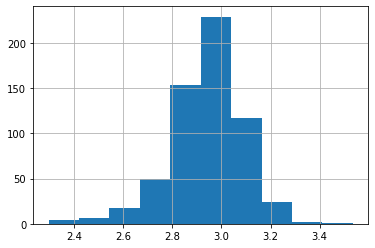

In [119]:
NamesWPSpeeches_grouped['novelty'][NamesWPSpeeches_grouped["WPs"] == "19"].hist()

<AxesSubplot:>

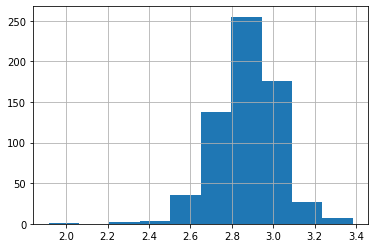

In [122]:
NamesWPSpeeches_grouped['novelty'][NamesWPSpeeches_grouped["WPs"] == "18"].hist()

<AxesSubplot:>

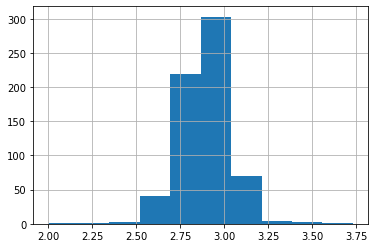

In [123]:
NamesWPSpeeches_grouped['novelty'][NamesWPSpeeches_grouped["WPs"] == "17"].hist()

<AxesSubplot:>

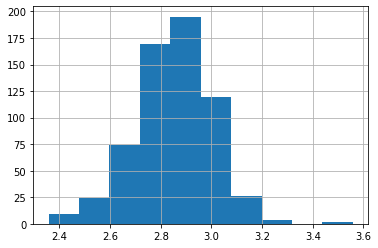

In [124]:
NamesWPSpeeches_grouped['novelty'][NamesWPSpeeches_grouped["WPs"] == "16"].hist()

<AxesSubplot:>

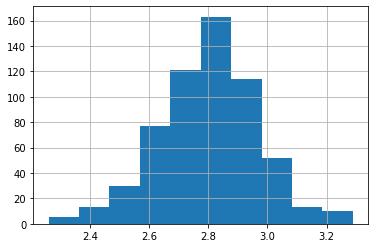

In [125]:
NamesWPSpeeches_grouped['novelty'][NamesWPSpeeches_grouped["WPs"] == "15"].hist()

<AxesSubplot:>

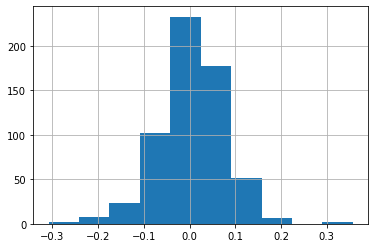

In [120]:
NamesWPSpeeches_grouped['resonance'][NamesWPSpeeches_grouped["WPs"] == "19"].hist()


<AxesSubplot:>

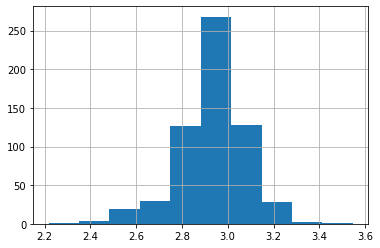

In [121]:
NamesWPSpeeches_grouped['transience'][NamesWPSpeeches_grouped["WPs"] == "19"].hist()

<AxesSubplot:>

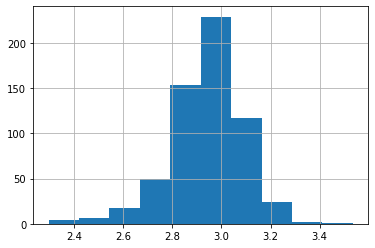

In [343]:
NamesWPSpeeches_grouped['novelty'][NamesWPSpeeches_grouped["WPs"] == "19"].hist()

In [244]:
NamesWPSpeeches_grouped_year_Party.tail(10)

,year,PARTY,novelty,transience,resonance,politicianID,pageid,month
209,2020,DIE LINKE.,3.029498,3.003245,0.026253,1.100397e+07,4.372483e+06,7.042453
210,2020,FDP,3.012242,2.974792,0.037451,1.100443e+07,6.372712e+06,6.864078
211,2020,Parteilos,3.043556,3.103845,-0.060289,1.100426e+07,5.117902e+06,7.300000
212,2020,SPD,2.944036,2.938103,0.005933,1.100411e+07,5.418569e+06,7.040000
213,2021,BÜNDNIS 90/DIE GRÜNEN,2.987454,3.001343,-0.013889,1.100414e+07,4.421144e+06,3.733189
214,2021,CDU/CSU,2.949654,2.961184,-0.011530,1.100417e+07,5.097435e+06,3.691176
215,2021,DIE LINKE.,3.011877,2.977449,0.034428,1.100398e+07,4.385085e+06,3.693095
216,2021,FDP,3.000059,2.971540,0.028519,1.100439e+07,6.318255e+06,3.784884
217,2021,Parteilos,2.929437,2.982874,-0.053437,1.100437e+07,5.610070e+06,3.895833
218,2021,SPD,2.980507,2.961719,0.018788,1.100413e+07,5.531496e+06,3.757241


<AxesSubplot:>

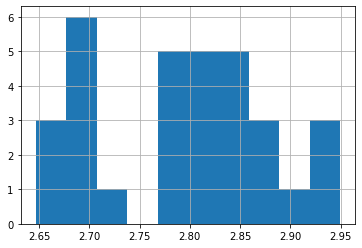

In [245]:
NamesWPSpeeches_grouped_year_Party['novelty'][(NamesWPSpeeches_grouped_year_Party["PARTY"] == "CDU/CSU")].hist()

<AxesSubplot:>

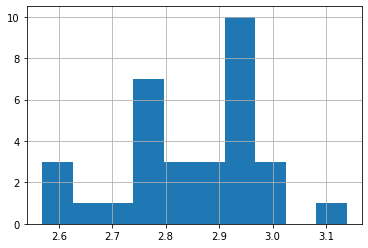

In [246]:
NamesWPSpeeches_grouped_year_Party['novelty'][NamesWPSpeeches_grouped_year_Party["PARTY"] == "BÜNDNIS 90/DIE GRÜNEN"].hist()

In [126]:
#list(speeches_and_WPs["speeches"])


In [317]:
#speech2KL.keys()

In [318]:
#speech2KL['25']

In [319]:
#list(NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] ==  NamesAndSpeeches["wikidataid"][6]])[0]